<h1 style="color:#388E3C;text-align:center">  Recommender System Final Project</h1>
<h3 style="color:#2196F3;text-align:center"> 410821220 李錦達   </h3>
<h3 style="color:#2196F3;text-align:center"> 410821234 陳欣昱   </h3>
<h3 style="color:#2196F3;text-align:center"> 410821237 劉書宇   </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from collections import Counter as ct

In [2]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

<h3 style="color:#1E5AAD"> 讀取使用者資料、職業、性別</h3>

In [3]:
users_names = ['user id', 'age', 'gender', 'occupation', 'zip code']
users = pd.read_csv(r'ml-100k/u.user', sep='|', names=users_names)

In [4]:
users_copy = users.copy()
occupation = pd.read_csv(r'ml-100k/u.occupation', header = None)
occupation_list = occupation.values
users_copy["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)

In [5]:
users_copy = users_copy.drop(columns='zip code')
users_copy = pd.get_dummies(users_copy, columns = ['gender'])
users_copy.head()

,user id,age,occupation,gender_F,gender_M
0,1,24,19,0,1
1,2,53,13,1,0
2,3,23,20,0,1
3,4,24,19,0,1
4,5,33,13,1,0


In [6]:
users_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user id     943 non-null    int64
 1   age         943 non-null    int64
 2   occupation  943 non-null    int64
 3   gender_F    943 non-null    uint8
 4   gender_M    943 non-null    uint8
dtypes: int64(3), uint8(2)
memory usage: 24.1 KB


<h3 style="color:#1E5AAD"> 顯示使用者的年齡分布折線圖 </h3>

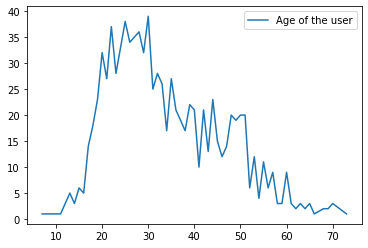

In [7]:
age_count = users_copy[["age"]].groupby("age", as_index=False).size()
plt.plot(age_count["age"], age_count["size"], label="Age of the user")
plt.legend()
plt.show() 

In [8]:
data_names = ['user id', 'item id', 'rating', 'timestamp']
data = pd.read_csv(r'ml-100k/u.data', sep='\t', names=data_names)

In [9]:
data = data.drop(columns='timestamp')
data = data.sort_values(['user id','item id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 32236 to 92115
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user id  100000 non-null  int64
 1   item id  100000 non-null  int64
 2   rating   100000 non-null  int64
dtypes: int64(3)
memory usage: 3.1 MB


In [10]:
print(data)

       user id  item id  rating
32236        1        1       5
23171        1        2       3
83307        1        3       4
62631        1        4       3
47638        1        5       3
...        ...      ...     ...
68857      943     1067       2
74200      943     1074       4
78704      943     1188       3
86600      943     1228       3
92115      943     1330       3

[100000 rows x 3 columns]


<h3 style="color:#1E5AAD"> 讀取電影資料 </h3>

In [11]:
movie_names = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]

movie = pd.read_csv(r'ml-100k/u.item', sep='|',  encoding = 'latin1', names=movie_names)

In [12]:
movie = movie.drop(columns='video_release_date')
movie = movie.drop(columns='IMDb_URL')
movie = movie.drop(columns='release_date')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_id      1682 non-null   int64 
 1   title        1682 non-null   object
 2   unknown      1682 non-null   int64 
 3   Action       1682 non-null   int64 
 4   Adventure    1682 non-null   int64 
 5   Animation    1682 non-null   int64 
 6   Children's   1682 non-null   int64 
 7   Comedy       1682 non-null   int64 
 8   Crime        1682 non-null   int64 
 9   Documentary  1682 non-null   int64 
 10  Drama        1682 non-null   int64 
 11  Fantasy      1682 non-null   int64 
 12  Film-Noir    1682 non-null   int64 
 13  Horror       1682 non-null   int64 
 14  Musical      1682 non-null   int64 
 15  Mystery      1682 non-null   int64 
 16  Romance      1682 non-null   int64 
 17  Sci-Fi       1682 non-null   int64 
 18  Thriller     1682 non-null   int64 
 19  War          1682 non-null 

In [13]:
# data aggregation
average_rating = data[["item id", "rating"]].groupby("item id", as_index=False).mean()  # average rating per movie
print(average_rating.sort_values("rating"))

      item id  rating
1363     1364     1.0
1560     1561     1.0
1558     1559     1.0
1556     1557     1.0
1600     1601     1.0
...       ...     ...
1121     1122     5.0
813       814     5.0
1652     1653     5.0
1466     1467     5.0
1292     1293     5.0

[1682 rows x 2 columns]


In [14]:
# merge two dataframes (average_rating and movies)
pd.merge(average_rating, movie[["title"]],left_index=True,right_index=True)

,item id,rating,title
0,1,3.878319,Toy Story (1995)
1,2,3.206107,GoldenEye (1995)
2,3,3.033333,Four Rooms (1995)
3,4,3.550239,Get Shorty (1995)
4,5,3.302326,Copycat (1995)
...,...,...,...
1677,1678,1.000000,Mat' i syn (1997)
1678,1679,3.000000,B. Monkey (1998)
1679,1680,2.000000,Sliding Doors (1998)
1680,1681,3.000000,You So Crazy (1994)


In [15]:
mix_table = pd.merge(data, movie, left_on = "item id", right_index = True)
mix_table = mix_table.sort_values(["user id","rating"], ascending=False)
mix_table.head()

,user id,item id,rating,item_id,title,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
90134,943,2,5,3,Four Rooms (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
70902,943,12,5,13,Mighty Aphrodite (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83794,943,42,5,43,Disclosure (1994),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
79678,943,55,5,56,Pulp Fiction (1994),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91861,943,56,5,57,Priest (1994),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
users_copy["favorite_tag_1"] = str(0)
users_copy["favorite_tag_2"] = str(0)
users_copy["favorite_tag_3"] = str(0)
users_copy["favorite_tag_4"] = str(0)
users_copy["favorite_tag_5"] = str(0)

In [17]:
for i in range(1, 944):
    person_rating = mix_table[mix_table["user id"] == i]
    person_rating = person_rating.drop(columns="title")
    person_sum = person_rating.sum()
    person_sum = person_sum.drop(labels = ["user id", "item id", "item_id", "rating"])
    array_ = person_sum.nlargest(5).index
    for j in range(0, 5):
        users_copy.loc[i-1, "favorite_tag_" + str(j + 1)] = str(array_[j])

In [18]:
print(users_copy)

     user id  age  occupation  gender_F  gender_M favorite_tag_1  \
0          1   24          19         0         1          Drama   
1          2   53          13         1         0          Drama   
2          3   23          20         0         1          Drama   
3          4   24          19         0         1       Thriller   
4          5   33          13         1         0         Comedy   
..       ...  ...         ...       ...       ...            ...   
938      939   26          18         1         0          Drama   
939      940   32           0         0         1          Drama   
940      941   20          18         0         1          Drama   
941      942   48          10         1         0          Drama   
942      943   22          18         0         1         Comedy   

    favorite_tag_2 favorite_tag_3 favorite_tag_4 favorite_tag_5  
0           Comedy         Action       Thriller        Romance  
1         Thriller        Romance         Comedy   

<h3 style="color:#1E5AAD"> 分析電影類別並製作成圓餅圖 </h3>

In [19]:
test = users_copy.copy()
#test = test.drop(columns = 'timestamp')
occupation = pd.read_csv(r'ml-100k/u.genre', header = None, sep='|', names=["type","code"])
occupation = occupation.drop(columns = "code")
occupation_list = occupation.values
for i in range(1, 6):
    test["favorite_tag_" + str(i)].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
test.head()

,user id,age,occupation,gender_F,gender_M,favorite_tag_1,favorite_tag_2,favorite_tag_3,favorite_tag_4,favorite_tag_5
0,1,24,19,0,1,8,5,1,16,14
1,2,53,13,1,0,8,16,14,5,1
2,3,23,20,0,1,8,16,5,1,6
3,4,24,19,0,1,16,8,1,5,6
4,5,33,13,1,0,5,1,8,2,4


In [22]:
test = users_copy.copy()
count_class = ct(test["favorite_tag_1"])
all_tag = pd.DataFrame.from_dict(count_class, orient='index', columns=["Count"])
print(tmp)

    Count
5     567
16     98
8     174
1      91
2       2
14      9
13      1
6       1


In [23]:
for i in range(2, 6):
    count_class = ct(test["favorite_tag_" + str(i)])
    tmp = pd.DataFrame.from_dict(count_class, orient='index', columns=["Count"])
    all_tag = all_tag.add(tmp, fill_value = 0).astype(int)

In [24]:
print(all_tag)

             Count
Action         912
Adventure      195
Children's      82
Comedy         931
Crime           87
Documentary      1
Drama          943
Film-Noir        1
Horror          19
Musical          3
Mystery         42
Romance        616
Sci-Fi          57
Thriller       807
War             19


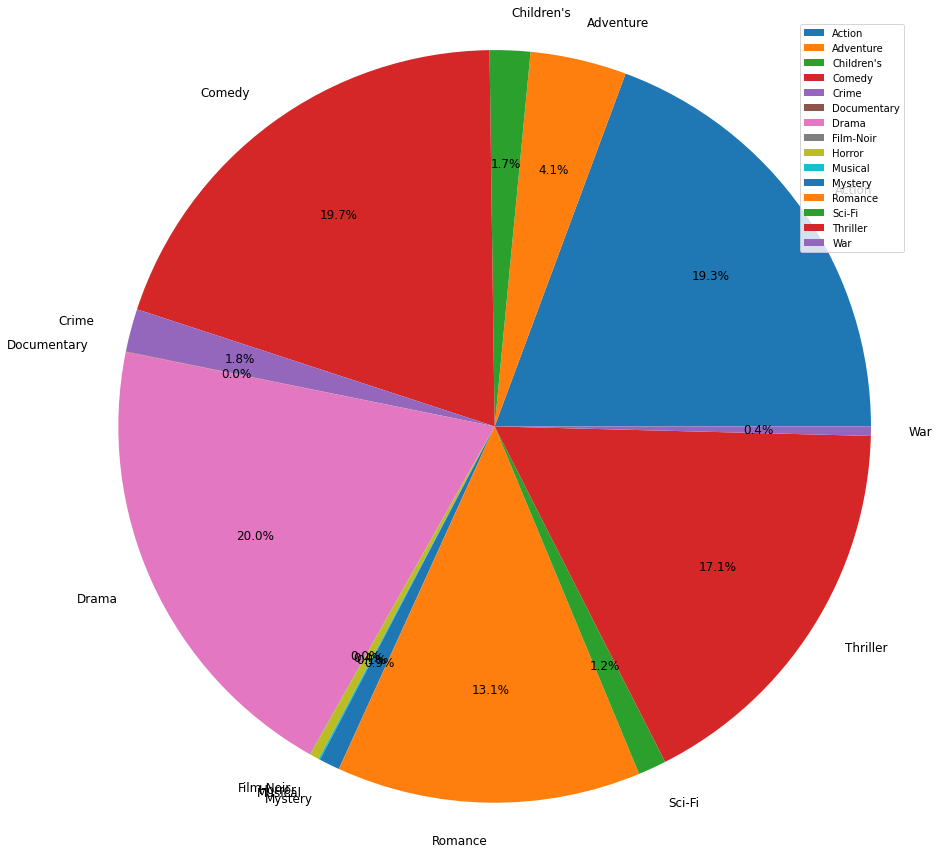

In [25]:
plt.figure(figsize=(15, 15))    # 顯示圖框架大小

labels = all_tag.index      # 製作圓餅圖的類別標籤                
size = all_tag["Count"]                         # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位         
        pctdistance = 0.7,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False)                    # 設定陰影

 
plt.axis('equal')                                          # 使圓餅圖比例相等
plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

# plt.savefig("Pie chart of car accident.jpg",   # 儲存圖檔
#             bbox_inches='tight',               # 去除座標軸占用的空間
#             pad_inches=0.0)                    # 去除所有白邊

In [26]:
gender_tag = users_copy.copy()
gender_tag = gender_tag.drop(columns = ["user id", "age", "occupation", "gender_F"])
gender_tag_m_t = gender_tag.drop(gender_tag[gender_tag["gender_M"] == 0].index)
gender_tag_f_t = gender_tag.drop(gender_tag[gender_tag["gender_M"] != 0].index)

count_class = ct(gender_tag_m_t["favorite_tag_1"])
gender_tag_m = pd.DataFrame.from_dict(count_class, orient='index', columns=["Count"])

count_class = ct(gender_tag_f_t["favorite_tag_1"])
gender_tag_f = pd.DataFrame.from_dict(count_class, orient='index', columns=["Count"])

In [27]:
for i in range(2, 6):
    count_class = ct(gender_tag_m_t["favorite_tag_" + str(i)])
    tmp = pd.DataFrame.from_dict(count_class, orient='index', columns=["Count"])
    gender_tag_m = gender_tag_m.add(tmp, fill_value = 0).astype(int)

In [28]:
for i in range(2, 6):
    count_class = ct(gender_tag_f_t["favorite_tag_" + str(i)])
    tmp = pd.DataFrame.from_dict(count_class, orient='index', columns=["Count"])
    gender_tag_f = gender_tag_f.add(tmp, fill_value = 0).astype(int)

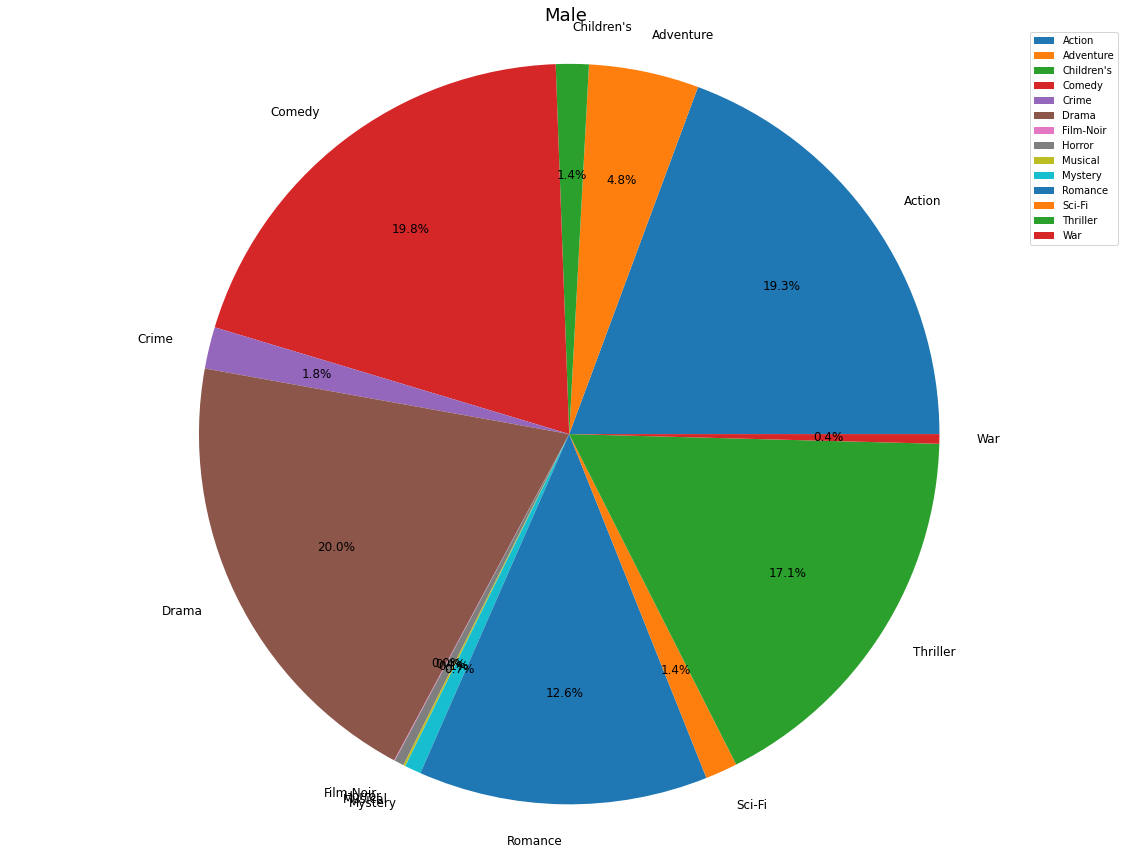

In [29]:
plt.figure(figsize=(20, 15))    # 顯示圖框架大小

labels = gender_tag_m.index      # 製作圓餅圖的類別標籤                
size = gender_tag_m["Count"]                         # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位         
        pctdistance = 0.7,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False)                    # 設定陰影

 
plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("Male", {"fontsize" : 18}) 
plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

# plt.savefig("Pie chart of car accident.jpg",   # 儲存圖檔
#             bbox_inches='tight',               # 去除座標軸占用的空間
#             pad_inches=0.0)                    # 去除所有白邊

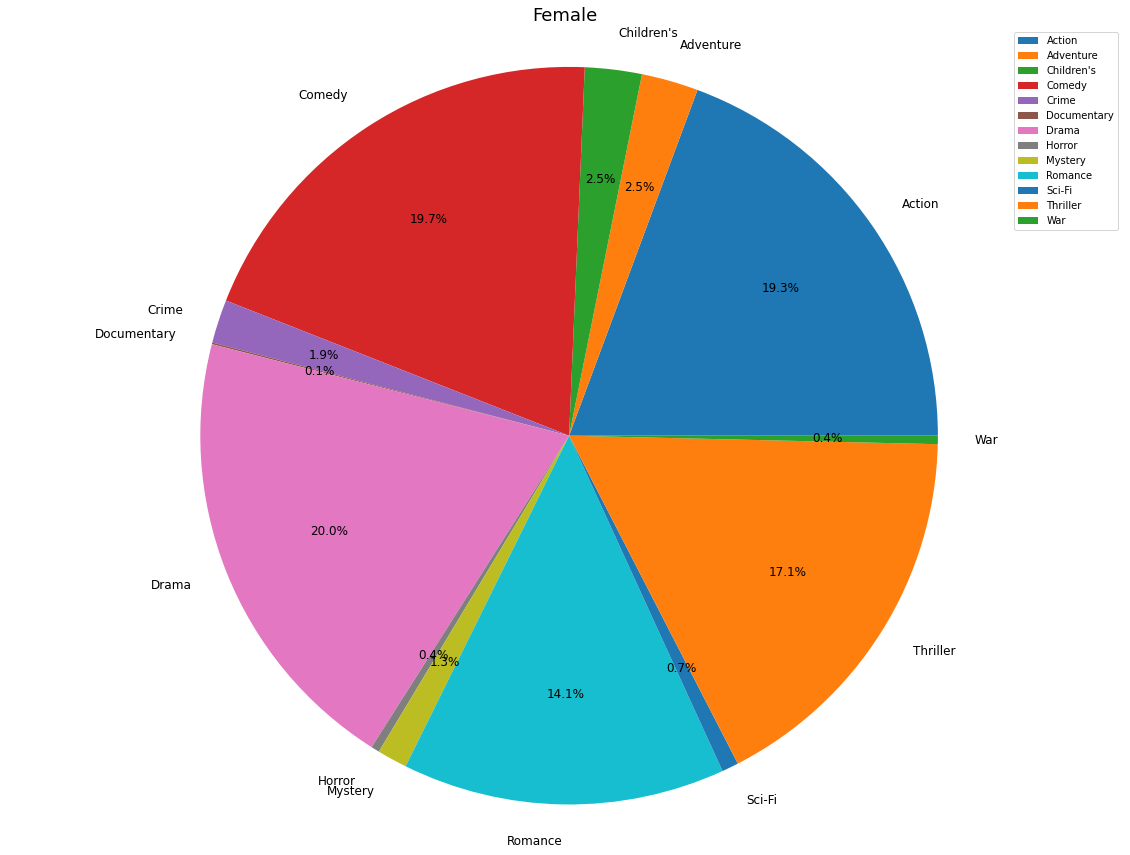

In [30]:
plt.figure(figsize=(20, 15))    # 顯示圖框架大小

labels = gender_tag_f.index      # 製作圓餅圖的類別標籤                
size = gender_tag_f["Count"]                         # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位         
        pctdistance = 0.7,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False)                    # 設定陰影

 
plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("Female", {"fontsize" : 18})  
plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

# plt.savefig("Pie chart of car accident.jpg",   # 儲存圖檔
#             bbox_inches='tight',               # 去除座標軸占用的空間
#             pad_inches=0.0)                    # 去除所有白邊

<h2 style="color:#39A275"> Item Base 做電影推薦 </h2> 

In [31]:
from sklearn.neighbors import NearestNeighbors as nnb

In [32]:
data_names = ['user_id', 'item_id', 'rating', 'timestamp']
x_train = pd.read_csv(r'ml-100k/ua.base', sep='\t', names=data_names)
x_train = x_train.drop(columns='timestamp')
x_test = pd.read_csv(r'ml-100k/ua.test', sep='\t', names=data_names)
x_test = x_test.drop(columns='timestamp')

In [33]:
df = x_train.pivot_table(index='item_id',columns='user_id',values='rating').fillna(0)
df1 = df.copy()
print(df)

user_id  1    2    3    4    5    6    7    8    9    10   ...  934  935  936  \
item_id                                                    ...                  
1        5.0  4.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  4.0  ...  2.0  3.0  4.0   
2        3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  0.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  4.0   
4        3.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  ...  5.0  0.0  0.0   
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1678     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1679     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1680     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1681     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1682     0.0  0.0  0.0  0.0 

In [34]:
x_true = x_test.pivot_table(index='item_id',columns='user_id',values='rating').fillna(0)
print(x_true)

user_id  1    2    3    4    5    6    7    8    9    10   ...  934  935  936  \
item_id                                                    ...                  
1        0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2        0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1646     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1653     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1656     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1662     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1664     0.0  0.0  0.0  0.0 

<h3 style="color:#1E5AAD"> 計算 Nearest Neighbors </h3>

In [35]:
def movie_recommender(user, num_neighbors):
    
    number_neighbors = num_neighbors
    knn = nnb(metric='cosine', algorithm='brute')
    knn.fit(df.values)
    distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)
    flag = 0
    
    # convert user_name to user_index
    user_index = df.columns.tolist().index(user)
    
    # t: movie_title, m: the row number of t in df
    for m,t in list(enumerate(df.index)):
        
        # find movies without ratings by user
        if df.iloc[m, user_index] == 0:
            sim_movies = indices[m].tolist()
            movie_distances = distances[m].tolist()
            
            if m in sim_movies:
                id_movie = sim_movies.index(m)
                sim_movies.remove(m)
                movie_distances.pop(id_movie) 
            
            # if the percentage of ratings in the dataset is very low, there are too many 0s in the dataset. 
            # Some movies have all 0 ratings and the movies with all 0s are considered the same movies by NearestNeighbors().
            else:
                sim_movies = sim_movies[:num_neighbors-1]
                movie_distances = movie_distances[:num_neighbors-1]
            
            movie_similarity = [1-x for x in movie_distances]
            movie_similarity_copy = movie_similarity.copy()
            nominator = 0
            
            # for each similar movie
            for s in range(0, len(movie_similarity)):
                if df.iloc[sim_movies[s], user_index] == 0:
                    if len(movie_similarity_copy) == (number_neighbors - 1):
                        movie_similarity_copy.pop(s)
                    else:
                        movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))
                else:
                    nominator = nominator + movie_similarity[s]*df.iloc[sim_movies[s],user_index]
        
            if len(movie_similarity_copy) > 0:
                if sum(movie_similarity_copy) > 0:
                    predicted_r = nominator/sum(movie_similarity_copy)
                else:
                    predicted_r = 0
            else:
                predicted_r = 0
            df1.iloc[m,user_index] = predicted_r

<h3 style="color:#1E5AAD"> ua.base num_neighbors = 30 </h3>

In [ ]:
num_neighbors = 30
for user in range(1, 944):
    movie_recommender(user, num_neighbors)

In [43]:
item_predict_30 = pd.read_csv(r'ml-100k/k30_after_predict.csv', index_col = "item_id")
item_predict_30

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,4.0,4.000000,3.000000,3.851037,4.000000,4.372161,4.338955,4.534742,4.000000,...,2.000000,3.0,4.000000,3.786668,4.00000,4.825996,3.728164,5.0,4.842748,4.000561
2,3.000000,0.0,0.000000,0.000000,3.538775,3.662318,3.960188,4.294128,5.000000,4.000000,...,4.000000,0.0,0.000000,0.000000,0.00000,0.000000,3.963308,0.0,5.000000,5.000000
3,4.000000,4.0,4.000000,4.000000,3.568437,3.163910,3.860971,3.601882,4.486422,4.156569,...,4.021836,4.0,4.000000,2.963526,3.28888,4.329771,4.004986,3.0,5.000000,4.011115
4,3.000000,0.0,0.000000,3.502613,3.536007,3.931299,5.000000,4.415219,5.000000,4.000000,...,5.000000,0.0,0.000000,0.000000,0.00000,0.000000,2.000000,0.0,4.507876,3.911577
5,3.000000,0.0,0.000000,4.000000,2.497622,3.502814,4.082148,3.990849,0.000000,4.284336,...,3.760546,0.0,0.000000,0.000000,0.00000,0.000000,3.656716,0.0,4.464877,4.038902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.000000,4.0,3.020696,5.000000,0.000000,4.000000,3.264716,0.000000,0.000000,4.000000,...,0.000000,0.0,3.984897,0.000000,4.00000,0.000000,1.398977,0.0,0.000000,0.000000
1679,0.000000,4.0,3.020696,5.000000,0.000000,4.000000,3.264716,0.000000,0.000000,4.000000,...,0.000000,0.0,3.984897,0.000000,4.00000,0.000000,1.398977,0.0,0.000000,0.000000
1680,0.000000,4.0,3.020696,5.000000,0.000000,4.000000,3.264716,0.000000,0.000000,4.000000,...,0.000000,0.0,3.984897,0.000000,4.00000,0.000000,1.398977,0.0,0.000000,0.000000


<h3 style="color:#1E5AAD"> ua.base num_neighbors = 800 </h3>

In [ ]:
num_neighbors = 800
for user in range(1, 944):
    movie_recommender(user, num_neighbors)

In [42]:
item_predict_800 = pd.read_csv(r'ml-100k/k800_after_predict.csv', index_col = "item_id")
item_predict_800

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,4.000000,2.927214,4.036501,3.175989,4.000000,4.111437,4.152950,4.346913,4.000000,...,2.000000,3.000000,4.000000,3.308509,4.000000,4.583646,3.597296,5.000000,4.425502,3.501927
2,3.000000,3.786454,2.993766,3.789232,3.091335,3.596823,4.075172,4.161205,4.544713,4.237903,...,4.000000,3.983002,3.543414,3.394045,3.449438,4.486480,3.591019,3.760285,4.436685,5.000000
3,4.000000,3.774045,2.857793,3.977564,3.151518,3.483735,4.002196,4.050681,4.468214,4.192225,...,3.728322,3.962361,4.000000,3.300544,3.388943,4.518375,3.517350,3.745056,4.356330,3.509564
4,3.000000,3.863031,2.960689,3.943548,3.163788,3.710748,5.000000,4.204441,4.534611,4.000000,...,5.000000,3.954750,3.666055,3.410454,3.464281,4.604336,2.000000,3.832101,4.433142,3.489390
5,3.000000,3.782444,2.870266,3.951918,3.021368,3.564543,4.002347,4.209899,4.529329,4.246136,...,3.710141,3.920683,3.510133,3.245207,3.468196,4.563427,3.556397,3.572375,4.425165,3.466470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,3.741587,3.704547,3.086917,4.717394,1.000000,3.064279,3.362542,3.304696,2.851474,3.849157,...,3.666647,4.652929,3.708677,2.880839,3.048737,5.000000,3.102865,4.000000,3.956855,0.000000
1679,3.741587,3.704547,3.086917,4.717394,1.000000,3.064279,3.362542,3.304696,2.851474,3.849157,...,3.666647,4.652929,3.708677,2.880839,3.048737,5.000000,3.102865,4.000000,3.956855,0.000000
1680,3.741587,3.704547,3.086917,4.717394,1.000000,3.064279,3.362542,3.304696,2.851474,3.849157,...,3.666647,4.652929,3.708677,2.880839,3.048737,5.000000,3.102865,4.000000,3.956855,0.000000


<h3 style="color:#1E5AAD"> ua.base num_neighbors = 1680 </h3>

In [ ]:
num_neighbors = 1680
for user in range(1, 944):
    movie_recommender(user, num_neighbors)

In [61]:
item_predict_1680 = pd.read_csv(r'ml-100k/uabase_after_predict.csv', index_col = "item_id")
item_predict_1680

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,4.000000,2.837871,4.217203,4.000000,4.000000,4.097175,4.001250,4.323833,4.000000,...,2.000000,3.000000,4.000000,3.314504,4.000000,4.489474,3.516785,4.291783,4.400874,3.514062
2,3.000000,3.796737,2.870531,4.097910,3.000000,3.618520,4.042557,3.975849,4.404006,4.232599,...,4.000000,3.791016,3.570333,3.328152,3.382037,4.435194,3.486991,4.313766,4.405297,5.000000
3,4.000000,3.766764,2.848729,4.069423,3.058666,3.528087,4.006899,3.904046,4.353371,4.194486,...,3.725333,3.753378,4.000000,3.237753,3.348090,4.492196,3.452405,4.263880,4.361954,3.525271
4,3.000000,3.846793,2.870827,4.202958,3.081407,3.692238,5.000000,4.024916,4.345161,4.000000,...,5.000000,3.730710,3.659631,3.404244,3.387192,4.478958,2.000000,4.307148,4.414199,3.527410
5,3.000000,3.795690,2.763894,4.067819,2.956524,3.578518,3.993614,3.999777,4.362210,4.230175,...,3.720773,3.795150,3.565652,3.282548,3.378772,4.450429,3.488889,4.282187,4.348017,3.513000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,3.246637,3.882854,3.154795,4.208532,1.000000,2.935421,3.540819,2.585465,4.820307,3.903013,...,3.872316,4.482853,3.731020,1.000000,3.202477,0.000000,3.164126,0.000000,3.976260,0.000000
1679,3.246637,3.882854,3.154795,4.208532,1.000000,2.935421,3.540819,2.585465,4.820307,3.903013,...,3.872316,4.482853,3.731020,1.000000,3.202477,0.000000,3.164126,0.000000,3.976260,0.000000
1680,3.246637,3.882854,3.154795,4.208532,1.000000,2.935421,3.540819,2.585465,4.820307,3.903013,...,3.872316,4.482853,3.731020,1.000000,3.202477,0.000000,3.164126,0.000000,3.976260,0.000000


<h3 style="color:#1E5AAD"> ub.base num_neighbors = 1675 </h3>

In [ ]:
num_neighbors = 1675
for user in range(1, 944):
    movie_recommender(user, num_neighbors)

In [41]:
item_predict_1675 = pd.read_csv(r'ml-100k/k1675_after_predict.csv', index_col = "item_id")
item_predict_1675

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,4.000000,2.837871,4.217203,4.000000,4.000000,4.097175,4.001250,4.323833,4.000000,...,2.000000,3.000000,4.000000,3.314504,4.000000,4.489474,3.516785,4.291783,4.400874,3.514062
2,3.000000,3.796737,2.870531,4.097910,3.000000,3.618520,4.042557,3.975849,4.404006,4.232599,...,4.000000,3.791016,3.570333,3.328152,3.382037,4.435194,3.486991,4.313766,4.405297,5.000000
3,4.000000,3.766764,2.848729,4.069423,3.058666,3.528087,4.006899,3.904046,4.353371,4.194486,...,3.725333,3.753378,4.000000,3.237753,3.348090,4.492196,3.452405,4.263880,4.361954,3.525271
4,3.000000,3.846793,2.870827,4.202958,3.081407,3.692238,5.000000,4.024916,4.345161,4.000000,...,5.000000,3.730710,3.659631,3.404244,3.387192,4.478958,2.000000,4.307148,4.414199,3.527410
5,3.000000,3.795690,2.763894,4.067819,2.956524,3.578518,3.993614,3.999777,4.362210,4.230175,...,3.720773,3.795150,3.565652,3.282548,3.378772,4.450429,3.488889,4.282187,4.348017,3.513000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,3.246637,3.882854,3.154795,4.208532,1.000000,2.935421,3.540819,2.585465,4.820307,3.903013,...,3.872316,4.482853,3.731020,1.000000,3.202477,0.000000,3.164126,0.000000,3.976260,0.000000
1679,3.246637,3.882854,3.154795,4.208532,1.000000,2.935421,3.540819,2.585465,4.820307,3.903013,...,3.872316,4.482853,3.731020,1.000000,3.202477,0.000000,3.164126,0.000000,3.976260,0.000000
1680,3.246637,3.882854,3.154795,4.208532,1.000000,2.935421,3.540819,2.585465,4.820307,3.903013,...,3.872316,4.482853,3.731020,1.000000,3.202477,0.000000,3.164126,0.000000,3.976260,0.000000


<h2 style="color:#39A275"> User Base 做電影推薦 </h2> 

In [39]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
predicted = pd.DataFrame([])
movies = pd.read_csv(r'ml-100k/Uitem.csv')
rate = pd.read_csv(r'ml-100k/Uabase.csv')
# display(movies.head())
# display(rate.head())

rate.drop('timestamp',axis=1,inplace=True)
df = pd.merge(rate,movies,on='movieId')
# df

agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()
# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>0]
# agg_ratings_GT100.info()

# agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False)

# Merge data
df_GT100 = pd.merge(df, agg_ratings_GT100[['title']], on='title', how='inner')
# df_GT100.info()

# Create user-item matrix
matrix = df_GT100.pivot_table(index='userId', columns='title', values='rating')
# matrix

# Normalize user-item matrix 由於有些人傾向於給出比其他人更高的評級，透過提取每個使用者的平均評級來讓評級較公正。
#評級低於使用者平均評分的電影獲得負值，評級高於使用者平均評分的電影獲得正值。
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
# matrix_norm

#用皮爾森衡量相似度
user_similarity = matrix_norm.T.corr()
# user_similarity

# Pick a user ID
for k in range(1,944):
    picked_userid = k
# Remove picked user ID from the candidate list
    user_similarity.drop(index=picked_userid, inplace=True)
# Take a look at the data
# user_similarity

# Number of similar users
    n = 942
# User similarity threashold
    user_similarity_threshold = 0
# 找出全部使用者與當前使用者的相似度
    similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Movies that the target user has watched
    picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
# picked_userid_watched

# Movies that similar users watched. Remove movies that none of the similar users have watched
    similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
# similar_user_movies

# Remove the watched movie from the movie list
    similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')
# Take a look at the data
# similar_user_movies

# 以下for loop推薦電影的時候才用，算rating不用
    item_score = {}
# Loop through items
    for i in similar_user_movies.columns:
  # Get the ratings for movie i
          movie_rating = similar_user_movies[i]
  # Create a variable to store the score
          total = 0
  # Create a variable to store the number of scores
          count = 0
  # Loop through similar users
          for u in similar_users.index:
    # If the movie has rating
                if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
                      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
                      total += score
      # Add 1 to the count
                      count +=1
  # Get the average score for the item
          item_score[i] = total / count
# Convert dictionary to pandas dataframe
    item_score = pd.DataFrame(item_score.items(), columns=['title', 'movie_score'])
    
# Sort the movies by score
    ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)
# Select top m movies
    m = 10
    
# 計算rating
# Average rating for the picked user
    avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]
# Print the average movie rating for user 1
# print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')
    ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating
    
#將電影id對到電影名稱
    ranked_item_score = pd.merge(movies,ranked_item_score,on='title')
    ranked_item_score = ranked_item_score.drop(columns = ['title','movie_score'])
#     ranked_item_score.sort_index(ascending=True, inplace=True)
    #print(picked_userid)
#     print(ranked_item_score)
#     predicted.insert(picked_userid,ranked_item_score)
    ranked_item_score = ranked_item_score.set_index('movieId')
    ranked_item_score.rename(columns = {'predicted_rating':str(k)},inplace = True)
    predicted=pd.concat([predicted,ranked_item_score],axis=1, join = 'outer')
#     print(ranked_item_score)
# print(predicted)

In [77]:
predicted

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieId,,,,,,,,,,,,,,,,,,,,,
20,3.580879,3.741367,2.742110,4.320547,2.940576,3.631692,3.916723,3.788940,4.032132,4.210038,...,NaN,4.004062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,3.587401,3.753707,2.867151,4.290697,2.916995,3.582271,3.934292,3.819847,4.080224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,3.713768,3.843860,2.879561,4.518035,2.981282,3.733828,3.995504,3.938137,4.302363,4.218067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,3.638667,3.774361,2.926981,4.435890,2.974109,NaN,3.996784,3.940305,4.218780,4.224447,...,3.772738,NaN,NaN,NaN,NaN,NaN,3.739966,NaN,4.518206,NaN
155,3.405604,3.509703,2.603072,3.862840,2.715160,3.449426,3.844425,3.691120,3.935023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,NaN,3.014973,4.678577,3.046078,NaN,NaN,4.074543,4.323004,NaN,...,NaN,4.073727,NaN,2.207373,2.300699,NaN,NaN,NaN,NaN,NaN
1543,NaN,NaN,2.889289,4.391054,NaN,NaN,3.963503,NaN,NaN,4.201699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,NaN,NaN,4.812165,3.170366,NaN,4.166881,4.297047,4.622816,4.414465,...,4.005807,3.973460,NaN,3.549014,3.615484,NaN,NaN,NaN,NaN,NaN


<h2 style="color:#39A275"> Confusion Matrix 做分類 </h2> 

<h3 style="color:#1E5AAD"> 設立容錯範圍 </h3>

In [46]:
def confusionMatrix(true, pred, ft):
    #ft: Fault Tolerance
    if (true == 5) and (pred >= (5 - ft)): #TP 
        CM[0][0] += 1
            
    if (true == 5) and (pred < (5 - ft)): #FN
        CM[0][1] += 1    
                
    if (true == 4) and (pred >= (4 - ft)): #TP 
        CM[0][0] += 1
                
    if (true == 4) and (pred < (4 - ft)): #FN
        CM[0][1] += 1
        
    if (true == 3) and (pred <= (3 + ft)) and (pred >= 3): #TP 
        CM[0][0] += 1
            
    if (true == 3) and (pred > (3 + ft)): #FP
        CM[1][0] += 1
            
    if (true == 3) and (pred >= (3 - ft)) and (pred < 3): #TN 
        CM[1][1] += 1
                
    if (true == 3) and (pred < (3 - ft)): #FN
        CM[0][1] += 1
            
    if (true == 2) and (pred <= (2 + ft)): #TN
        CM[1][1] += 1
                
    if (true == 2) and (pred > (2 + ft)): #FP
        CM[1][0] += 1
            
    if (true == 1) and (pred <= (1 + ft)): #TN
        CM[1][1] += 1
            
    if (true == 1) and (pred > (1 + ft)): #FP
        CM[1][0] += 1
    
    return CM                

In [47]:
def getPrecision(CM):
    return CM[0][0] / (CM[0][0] + CM[1][0])
def getRecall(CM):
    return CM[0][0] / (CM[0][0] + CM[0][1])
def getF1(CM):
    p = getPrecision(CM)
    r = getRecall(CM)
    return 2 * p * r / (p + r)

In [78]:
predict_rating = pd.DataFrame([], dtype = float)
true_rating = pd.DataFrame([], dtype = float)
CM = [[0 for _ in range(2)] for _ in range(2)]

In [79]:
ft = 1
for i in range(0, 9430):
    tmp_user_id = x_test.at[i, "user_id"]
    tmp_item_id = x_test.at[i, "item_id"]
    true_rating = x_test.at[i, "rating"]
    predict_rating = item_predict_1675.iat[tmp_item_id - 1, tmp_user_id - 1] #前面是item_id-1, 後面是user_id-1
    CM = confusionMatrix(true_rating, predict_rating, ft)
    
print(CM)

[[7868, 14], [42, 1506]]


In [57]:
print("CF_item_base at data_a of 30 num_neighbors:"+"\n"+"Precision is ", getPrecision(CM),"\n"+"Recall is ", getRecall(CM),"\n"+"F1 is ", getF1(CM),"\n")

CF_item_base at data_a of 30 num_neighbors:
Precision is  0.7819240439327776 
Recall is  0.8353124116482895 
F1 is  0.8077369967876427 



In [59]:
print("CF_item_base at data_a of 800 num_neighbors:"+"\n"+"Precision is ", getPrecision(CM),"\n"+"Recall is ", getRecall(CM),"\n"+"F1 is ", getF1(CM),"\n")

CF_item_base at data_a of 800 num_neighbors:
Precision is  0.7858080609163712 
Recall is  0.8248466891752222 
F1 is  0.8048542710189263 



In [63]:
print("CF_item_base at data_a of 1680 num_neighbors:"+"\n"+"Precision is ", getPrecision(CM),"\n"+"Recall is ", getRecall(CM),"\n"+"F1 is ", getF1(CM),"\n")

CF_item_base at data_a of 1680 num_neighbors:
Precision is  0.8571984099550639 
Recall is  0.8858673811118554 
F1 is  0.8712971299325853 



In [65]:
print("CF_item_base at data_b of 1675 num_neighbors:"+"\n"+"Precision is ", getPrecision(CM),"\n"+"Recall is ", getRecall(CM),"\n"+"F1 is ", getF1(CM),"\n")

CF_item_base at data_b of 1675 num_neighbors:
Precision is  0.8922200038642365 
Recall is  0.9151170855765102 
F1 is  0.9035235036115503 



In [81]:
predicted.fillna(value = 0,inplace = True)
ft = 1
CM2 = [[0 for _ in range(2)] for _ in range(2)]
data_names = ['user_id','item_id','rating','T']
ut = pd.read_csv(r'ml-100k/Ubtest.csv',sep = ',',names = data_names)
ut = ut.drop(columns = 'T')
for i in range(1,9430):
    user_id = int(ut.at[i,'user_id'])
    item_id = int(ut.at[i,'item_id'])
    true_rating = int(ut.at[i,'rating'])
    tmp = predicted.loc[item_id]
    predicted_rating = tmp.get(str(user_id))
    CM2 = confusionMatrix(true_rating, predicted_rating, ft)
print(CM2)

[[7868, 7889], [42, 3060]]


In [82]:
print("CF_user_base at data_a:"+"\n"+"Precision is ", getPrecision(CM2),"\n"+"Recall is ", getRecall(CM2),"\n"+"F1 is ", getF1(CM2),"\n")

CF_user_base at data_a:
Precision is  0.9946902654867257 
Recall is  0.49933362949800086 
F1 is  0.6648920437740312 



In [75]:
print("CF_user_base at data_b:"+"\n"+"Precision is ", getPrecision(CM2),"\n"+"Recall is ", getRecall(CM2),"\n"+"F1 is ", getF1(CM2),"\n")

CF_user_base at data_b:
Precision is  0.8476493712090218 
Recall is  0.8485852164467476 
F1 is  0.8481170356659785 



<h2 style="color:#39A275"> Linear Regression </h2> 

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [84]:
data_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [85]:
x_train = pd.read_csv(r'ml-100k/ub.base', sep='\t', names=data_names)
x_train = x_train.drop(columns='timestamp')
x_test = pd.read_csv(r'ml-100k/ub.test', sep='\t', names=data_names)
x_test = x_test.drop(columns='timestamp')

In [86]:
model = LinearRegression()
model.fit(x_train[['user_id', 'item_id']], x_train["rating"])

LinearRegression()

In [88]:
y_predict = model.predict(x_test[['user_id', 'item_id']])
mse = mean_squared_error(x_test["rating"], y_predict)
y_true = x_test["rating"].to_numpy()

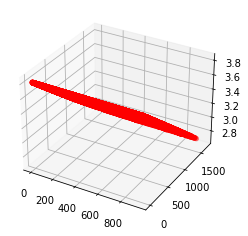

In [89]:
x_train_x = x_train['user_id']
x_train_y = x_train['item_id']
x_train_z = x_train['rating']
z = model.predict(x_train[['user_id', 'item_id']])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_train_x, x_train_y, z,cmap='blues', color = "red")
plt.show()

In [50]:
print("LinearRegression at data_a:"+"\n"+"Precision is ", getPrecision(CM),"\n"+"Recall is ", getRecall(CM),"\n"+"F1 is ", getF1(CM),"\n")

LinearRegression at data_a:
Precision is  0.7855129650507328 
Recall is  0.7122412471249681 
F1 is  0.7470848411741053 



In [51]:
print("LinearRegression at data_b:"+"\n"+"Precision is ", getPrecision(CM),"\n"+"Recall is ", getRecall(CM),"\n"+"F1 is ", getF1(CM),"\n")

LinearRegression at data_b:
Precision is  0.7855129650507328 
Recall is  0.7122412471249681 
F1 is  0.7470848411741053 

